# Part One


### Introduction
Suicide is a global phenomenon, and it occurs throughout the lifespan. According to the World Health Organization, close to 800,000 people die due to suicide every year. In fact, suicide is the 18th leading cause of death in 2016.<br>
In order to push policy makers to provide support for effective and evidence-based interventions implemented at population, it is extremely important to identify possible indicators for suicide attemps. <br>

### Goal
In the light of these facts, the goal of this project is to identify signals correlated to increased global suicide rates by analyzing two datasets: global suicide rates dataset and global GDP growth dataset. We will analyze the dataset with consideration of differences in time, geographical region, and social-economic status of the population.<br>
This project use an interactive approach to provide visualization for the dataset.

### Data Source Description
We used two datasources in this project. Here is an overview of each of the dataset: <br>
<b>1. Suicide Rates Overview, 1985 to 2016 Dataset</b><br>
<u>Source:</u><br>
The suicide rates dataset contains global suicide rate data organized by country and year sourced from the World Health Organization. This dataset also contains social-economic status of the country population. It is compiled from a <a href="https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016">Kaggle</a> dataset pulled from four other datasets from: <br><ul>
<li>United Nations Development Program (2018). Human development index (HDI). Retrieved from <a href="http://hdr.undp.org/en/indicators/137506">website</a></li>
<li>World Bank. (2018). World development indicators: GDP (current US$) by country:1985 to 2016. Retrieved from <a href="http://databank.worldbank.org/data/source/world-development-indicators#">website</a></li>
<li>[Szamil]. (2017). Suicide in the Twenty-First Century [dataset]. Retrieved from <a href="https://www.kaggle.com/szamil/suicide-in-the-twenty-first-century/notebook">website</a></li>
<li>World Health Organization. (2018). Suicide prevention. Retrieved from <a href="http://www.who.int/mental_health/suicide-prevention/en/">website</a></li>
</ul>
<br>


<b>2. National GDP Growth, 1985 to 2016 Dataset</b><br>
<u>Source:</u><br>
We are interested in whether national economic status is an indicator of suicide attemps. So we combined the previous dataset with the national GDP dataset, which contains national GDP growth over 1985 to 2016. It is sourced from this <a href="https://data.worldbank.org/indicator/ny.gdp.mktp.kd.zg">World Bank</a> dataset.<br>


### Research Question
1. How does suicide rate (per 100k) vary by continent?
2. by gender?
3. by age?
4. by country?
5. How suicide rate changes over years within country?
6. As a country gets richer, does it’s suicide rate decrease?
To explore these questions, we perform the exploratory data analysis and proceeds to clean data below.

### Data Cleaning Description
The data cleaning is composed of two steps--merging two datasets and dropping data that are not meaningful. 
#### Merging two datasets
In National GDP Growth dataset, we are only interested in the GDP growth of 
different countries from 1985 to 2016, so we dropped all other columns other than 'Country Name' and years. This dataset lists years as columns and country as rows. Each entry is the country's GDP growth of the year. We reorganize the structure to three columns: 'country', 'year' and 'gdp_growth' and then merge with the suicide dataset. 

#### Dropping unmeaningful data

*   **Amount of Data Available By Year:** There isn't much data available in 2016. Specifically, we only have data from ['Armenia', 'Austria', 'Croatia', 'Cyprus', 'Czech Republic',
       'Grenada', 'Hungary', 'Iceland', 'Lithuania', 'Mauritius',
       'Mongolia', 'Netherlands', 'Qatar', 'Romania', 'Sweden',
       'Thailand'], which is not a good amount for meaningful visualization. This is shown in visualization below. 
*   **Number of non-NaN in HDI data:** The proportion of non-NaN entries in the column of 'HDI for year' is only around 0.3. After eyeballing the column, we found that the places that any values showed in the column are quite inconsistent, so we decide to drop the column.


In [0]:
import urllib.request
urllib.request.urlretrieve('https://onedrive.live.com/download?cid=1ABF8B3A88607926&resid=1ABF8B3A88607926%2127196&authkey=ADxaLtGwGAuSaGw', 'master.csv')
urllib.request.urlretrieve('https://onedrive.live.com/download?cid=1ABF8B3A88607926&resid=1ABF8B3A88607926%2127197&authkey=AJikGQZfKzpnejA', 'gdp_growth.csv')
urllib.request.urlretrieve('https://onedrive.live.com/download?cid=1ABF8B3A88607926&resid=1ABF8B3A88607926%2127199&authkey=AJWPxRa-KErzCJM', 'master_1985_2015.csv')

('master_1985_2015.csv', <http.client.HTTPMessage at 0x7fc743c83a90>)

In [1]:
import pandas as pd
import matplotlib.pylab as plt

In [0]:
df=pd.read_csv('master.csv')
df1=pd.read_csv('gdp_growth.csv')
for i in list(range(1960, 1985)) + list(range(2017, 2020)):
    df1=df1.drop(str(i),axis=1)
df1=df1.drop(columns='Indicator Code')
df1=df1.drop(columns='Indicator Name')
df1=df1.drop(columns='Country Code')
df1=df1.drop(columns='Unnamed: 64')
df_cleaned=pd.DataFrame(columns=['country', 'year', 'gdp_growth'])
for year in range(1985, 2017):
    for ind in df1.index: 
        df_cleaned=df_cleaned.append({'country':df1['Country Name'][ind], 'year':year, 'gdp_growth':df1[str(year)][ind]}, ignore_index=True)
df_cleaned=df_cleaned.sort_values(by=['country', 'year'])
df_new=df.merge(df_cleaned, on=['country', 'year'])

# data available in 2016
print(df_new[df_new['year']==2016]['country'].unique())

['Armenia' 'Austria' 'Croatia' 'Cyprus' 'Czech Republic' 'Grenada'
 'Hungary' 'Iceland' 'Lithuania' 'Mauritius' 'Mongolia' 'Netherlands'
 'Qatar' 'Romania' 'Sweden' 'Thailand']


**Amount of Data Available By Year**

<BarContainer object of 32 artists>

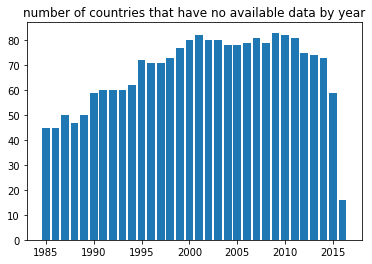

In [0]:
import matplotlib.pylab as plt
import matplotlib.image as mpimg

num_countries_by_year={}
for i in range(1985, 2017):
    num_countries_by_year[i]=len(df_new[df_new['year']==i]['country'].unique())

lists = sorted(num_countries_by_year.items())
x, y = zip(*lists)
plt.title('number of countries that have no available data by year')
plt.bar(x, y)

**Number of non-NaN in HDI data**

In [0]:
num_nan=df_new['HDI for year'].isna().sum()
num_rows=df_new['HDI for year'].shape[0]
print('proportion of non-NaN in HDI column', (num_rows-num_nan)/num_rows)

proportion of non-NaN in HDI column 0.30611299783883916


**Cleaning the Datset**

In [0]:
# df_new=df_new.drop(columns='HDI for year')
# df_new=df_new[df_new['year']!=2016]
df_new=pd.read_csv('master_1985_2015.csv')  # equivalent to the two lines above

### Exploratory Analysis
#### Non Interactive Browsing of Data
*   We visualized the years and countries that have no suicide. To be specific, we visualize in two ways, one is plotting the number of countries in each year that has no suicide, and the other is plotting the years of those countries that have no suicide for some particular years (i.e., the countries not shown in the plot always have at least 1 suicide case throughout 1985-2015). The second plot is more interesting in a sense that countries shown in this plot are "smaller" countries. We proved this by ploting the average population from 1985 to 2015 and listed the 10 countries with the least population. We will probably pay extra attention to how to interpret the effects of Antigua and Barbuda, Grenada, Barbados, Kiribati and Dominica from our further visualization since both of the countires have very small populations (i.e., smaller countries), so the fact that they have a lot of years of no suicide might be due to the fact that the data is not collected well. 

#### Our First-Attempt Interactive Data Analysis
* We conducted a preliminary global suicide trend analysis. In specific, we created three interactive plots using plotly to visualize the number of suicides per 100k people per year grouped by age and gender. From the first plot, we learned that the suicide rate showed an incresing pattern from 1985 to 1995, and a decreasing pattern from 1995 to 2015. We would like to further explore this global trend in future work. From the second plot which is grouped by gender, we learned that male have a much higher suicide rate than female. From the third plot which is grouped by age, we learned that older people have a higher suicide rate than younger people. These plots give us an overview of the worldwide suicide trend over the 30 years, and in future work, we would like to conduct more in-depth continent-level and country-level analysis. 

**No Suicide: Year and Country**
1.   No suicide country by year: here we investigate the number of countries that have no suicide by each year. The maximum number is 4, which is not too bad compared to the total number of countries 92. 
2.   No suicide year by country: now we can see which countries have no suicide and what years they don't have suicide. By eyeballing those countries, we found that they are usually smaller size (investigated in the next text cell). Besides, no countries have 0 suicide all years, so maybe the 0 suicide is just caused by smaller population. 



no_suicide_country_by_year {2005: ['Albania', 'Antigua and Barbuda'], 2006: ['Albania', 'Antigua and Barbuda', 'Jamaica', 'Montenegro'], 2009: ['Albania', 'Antigua and Barbuda', 'Grenada'], 1985: ['Antigua and Barbuda', 'Dominica'], 1986: ['Antigua and Barbuda'], 1987: ['Antigua and Barbuda'], 1988: ['Antigua and Barbuda'], 1989: ['Antigua and Barbuda', 'Jamaica'], 1991: ['Antigua and Barbuda', 'Grenada'], 1992: ['Antigua and Barbuda', 'Grenada'], 1994: ['Antigua and Barbuda'], 1995: ['Antigua and Barbuda', 'Qatar'], 1998: ['Antigua and Barbuda', 'Bahrain'], 1999: ['Antigua and Barbuda', 'Kiribati'], 2002: ['Antigua and Barbuda', 'Barbados', 'Grenada', 'Montenegro'], 2008: ['Antigua and Barbuda', 'Grenada', 'Maldives'], 2012: ['Antigua and Barbuda', 'Barbados'], 2013: ['Antigua and Barbuda', 'Barbados', 'Grenada'], 2014: ['Antigua and Barbuda', 'Grenada'], 1997: ['Bahrain'], 2003: ['Barbados', 'Montenegro'], 2007: ['Barbados'], 2011: ['Barbados'], 2001: ['Grenada', 'Kiribati', 'Montene

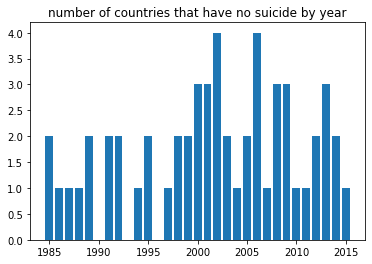

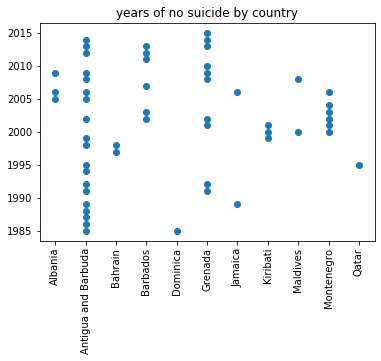

In [0]:
countries=df_new['country'].unique()
no_suicide_country_by_year={}
no_suicide_year_by_country={}
for country in countries:
    tmp_df=df_new[df_new['country']==country]
    years=tmp_df['year'].unique()
    suicide=0
    for year in years:
        if tmp_df[tmp_df['year']==year]['suicides_no'].sum()==0:
            if year in no_suicide_country_by_year:
                no_suicide_country_by_year[year]+=[country]
            else:
                no_suicide_country_by_year[year]=[country]
            if country in no_suicide_year_by_country:
                no_suicide_year_by_country[country]+=[year]
            else:
                no_suicide_year_by_country[country]=[year]
print('no_suicide_country_by_year', no_suicide_country_by_year)
print('print(no_suicide_year_by_country)', print(no_suicide_year_by_country))

x=[]
y=[]
for key in no_suicide_country_by_year:
    x.append(key)
    y.append(len(no_suicide_country_by_year[key]))
plt.title('number of countries that have no suicide by year')
plt.bar(x, y)
plt.show()

x=[]
y=[]
for country in no_suicide_year_by_country:
    for year in no_suicide_year_by_country[country]:
        x.append(country)
        y.append(year)
plt.title('years of no suicide by country')
plt.xticks(rotation=90)
plt.scatter(x, y)
plt.show()

**Population by Country**

This investigation continues from the doubt above. We plotted the average population per year for each country. This is a typical right-skewed distribution. We printed the countries with 10 least population and this confirmed our hypothesis that the countries that has 0 suicide are mostly in these countries that have the least population. 

In [0]:
avg_population={}
countries=df_new['country'].unique()
for country in countries:
    tmp_df=df_new[df_new['country']==country]
    years=tmp_df['year'].unique()
    pop=0
    for year in years:
        pop+=tmp_df[tmp_df['year']==year]['population'].sum()
    avg_population[country]=pop/len(years)

lists = sorted(avg_population.items())

x, y = zip(*lists)
y, x = zip(*sorted(zip(y, x), reverse=True))
print('10 countries with the least population:', x[-10:])

fig = plt.figure(figsize=(20, 2))
ax = fig.add_subplot(111)
ax.set_xticklabels(x, rotation=90)
ax.bar(x, y)

10 countries with the least population: ('Iceland', 'Barbados', 'Belize', 'Grenada', 'Aruba', 'Seychelles', 'Antigua and Barbuda', 'Kiribati', 'Dominica', 'San Marino')


<BarContainer object of 92 artists>